In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv file into a pandas dataframe
df = pd.read_csv('../data/cleaned_data.csv')

In [128]:
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [129]:

df.groupby('Accident_Severity').count()['Accident_Index']

# Shows count of Accidents depending on Severity

Accident_Severity
0    791758
1    140931
Name: Accident_Index, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932689 entries, 0 to 932688
Data columns (total 58 columns):
 #   Column                                                                               Non-Null Count   Dtype  
---  ------                                                                               --------------   -----  
 0   Unnamed: 0                                                                           932689 non-null  int64  
 1   Accident_Index                                                                       932689 non-null  object 
 2   Location_Easting_OSGR                                                                932689 non-null  int64  
 3   Location_Northing_OSGR                                                               932689 non-null  int64  
 4   Longitude                                                                            932689 non-null  float64
 5   Latitude                                                                       

In [131]:
cols= df[['Longitude', 'Latitude','Urban_or_Rural_Area', 'Months', 'Rush Hour', 'Speed_limit' ,
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Slip road', 'Road_Type_Unknown',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown']]

In [132]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932689 entries, 0 to 932688
Data columns (total 32 columns):
 #   Column                                                                               Non-Null Count   Dtype  
---  ------                                                                               --------------   -----  
 0   Longitude                                                                            932689 non-null  float64
 1   Latitude                                                                             932689 non-null  float64
 2   Urban_or_Rural_Area                                                                  932689 non-null  int64  
 3   Months                                                                               932689 non-null  int64  
 4   Rush Hour                                                                            932689 non-null  int64  
 5   Speed_limit                                                                    

In [133]:
X = cols.values

y = df['Accident_Severity'].values

logit_model = Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.417483
         Iterations 6


In [134]:
print(logit_model.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.017      
Dependent Variable: y                AIC:              778827.5184
Date:               2020-12-03 00:13 BIC:              779203.3849
No. Observations:   932689           Log-Likelihood:   -3.8938e+05
Df Model:           31               LL-Null:          -3.9603e+05
Df Residuals:       932657           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.0457     0.0021    -21.5579   0.0000   -0.0498   -0.0415
x2       -0.0359     0.0003   -104.1989   0.0000   -0.0365   -0.0352
x3       -0.2711     0.0086    -31.3520   0.0000   -0.2881   -0.2542
x4       

In [135]:
#  Variance Inflation Factors 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = cols.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(cols.values, i) 
                          for i in range(len(cols.columns))] 
  
print(vif_data)

                                              feature        VIF
0                                           Longitude   2.133918
1                                            Latitude  39.676817
2                                 Urban_or_Rural_Area   5.879506
3                                              Months   4.846470
4                                           Rush Hour   2.052762
5                                         Speed_limit  20.867144
6                          Road_Type_Dual carriageway   1.505942
7                            Road_Type_One way street   1.034047
8                                Road_Type_Roundabout   1.108634
9                                 Road_Type_Slip road   1.038999
10                                  Road_Type_Unknown   1.010208
11  Road_Surface_Conditions_Flood (Over 3cm of water)   1.026658
12                  Road_Surface_Conditions_Frost/Ice   1.183324
13                       Road_Surface_Conditions_Snow   1.874134
14                   Road

In [153]:
cols2= df[['Urban_or_Rural_Area', 'Months', 'Rush Hour', 'Speed_limit' ,
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Slip road', 'Road_Type_Unknown',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown']]

In [141]:
#  Variance Inflation Factors 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = cols2.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(cols2.values, i) 
                          for i in range(len(cols2.columns))] 
  
print(vif_data)

                                              feature       VIF
0                                             Weekend  1.334534
1                                 Urban_or_Rural_Area  2.711336
2                                              Months  4.400688
3                                           Rush Hour  2.021462
4                                         Speed_limit  5.384265
5                          Road_Type_Dual carriageway  1.384212
6                            Road_Type_One way street  1.032719
7                                Road_Type_Roundabout  1.107977
8                                 Road_Type_Slip road  1.032089
9                                   Road_Type_Unknown  1.008908
10  Road_Surface_Conditions_Flood (Over 3cm of water)  1.026629
11                  Road_Surface_Conditions_Frost/Ice  1.182175
12                       Road_Surface_Conditions_Snow  1.873205
13                   Road_Surface_Conditions_Wet/Damp  2.461120
14  Pedestrian_Crossing-Physical_Facilit

In [142]:
X = cols2.values

target = df['Accident_Severity']
y = target.values

logit_model = Logit(y, X).fit()

print(logit_model.summary2())



Optimization terminated successfully.
         Current function value: 0.423598
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.002      
Dependent Variable: y                AIC:              790231.8139
Date:               2020-12-03 00:31 BIC:              790595.9346
No. Observations:   932689           Log-Likelihood:   -3.9508e+05
Df Model:           30               LL-Null:          -3.9603e+05
Df Residuals:       932658           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.0865     0.0066     13.1044   0.0000    0.0735    0.0994
x2       -0.9123     0.0058   -156.6269   0.0

In [143]:
# # Next one: Removed Urban_rural to apply regularization

# cols3= df[[ 'Weekend','Rush Hour', 'Speed_limit' ,
#        'Road_Type_Dual carriageway', 'Road_Type_One way street',
#        'Road_Type_Roundabout', 'Road_Type_Slip road', 'Road_Type_Unknown',
#        'Road_Surface_Conditions_Flood (Over 3cm of water)',
#        'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
#        'Road_Surface_Conditions_Wet/Damp',
#        'Pedestrian_Crossing-Physical_Facilities_Central refuge',
#        'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
#        'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
#        'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
#        'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
#        'Light_Conditions_Darkeness: No street lighting',
#        'Light_Conditions_Darkness: Street lighting unknown',
#        'Light_Conditions_Darkness: Street lights present and lit',
#        'Light_Conditions_Darkness: Street lights present but unlit',
#        'Weather_Conditions_Fine with high winds',
#        'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
#        'Weather_Conditions_Raining with high winds',
#        'Weather_Conditions_Raining without high winds',
#        'Weather_Conditions_Snowing with high winds',
#        'Weather_Conditions_Snowing without high winds',
#        'Weather_Conditions_Unknown']]


# X = cols3.values
# y = df['Accident_Severity'].values
# logit_model = Logit(y, X).fit()
                             
# print(logit_model.summary2())                             
                             


In [98]:
cols3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932689 entries, 0 to 932688
Data columns (total 29 columns):
 #   Column                                                                               Non-Null Count   Dtype
---  ------                                                                               --------------   -----
 0   Weekend                                                                              932689 non-null  int64
 1   Rush Hour                                                                            932689 non-null  int64
 2   Speed_limit                                                                          932689 non-null  int64
 3   Road_Type_Dual carriageway                                                           932689 non-null  int64
 4   Road_Type_One way street                                                             932689 non-null  int64
 5   Road_Type_Roundabout                                                                 932689 n

In [ ]:
# result=logit.fit_regularized(method='l1')                                 

In [95]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = cols3.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(cols3.values, i) 
                          for i in range(len(cols3.columns))] 
  
print(vif_data)

                                              feature       VIF
0                                             Weekend  1.318805
1                                           Rush Hour  1.899053
2                                         Speed_limit  3.531400
3                          Road_Type_Dual carriageway  1.364917
4                            Road_Type_One way street  1.023980
5                                Road_Type_Roundabout  1.107147
6                                 Road_Type_Slip road  1.029437
7                                   Road_Type_Unknown  1.008391
8   Road_Surface_Conditions_Flood (Over 3cm of water)  1.026331
9                   Road_Surface_Conditions_Frost/Ice  1.180561
10                       Road_Surface_Conditions_Snow  1.873027
11                   Road_Surface_Conditions_Wet/Damp  2.448506
12  Pedestrian_Crossing-Physical_Facilities_Centra...  1.025124
13  Pedestrian_Crossing-Physical_Facilities_Footbr...  1.008516
14  Pedestrian_Crossing-Physical_Facilit

In [ ]:
# # Interpreting the beta coefficients with the Odds Ratio

# model = LogisticRegression(solver='lbfgs')
# model.fit(X, y)

# for name, coef in zip(df.columns[1:], model.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))
    
    
# for i, coef in enumerate(model.coef_[0]):
#     print("beta{0}: {1:0.5f}".format(i + 1, np.exp(coef)))

In [103]:
# for name, coef in zip(cols3.columns, logit_model.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))
    
Logit(y, X).fit().params.values

Optimization terminated successfully.
         Current function value: 0.442411
         Iterations 6


AttributeError: 'numpy.ndarray' object has no attribute 'values'

### Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

In [ ]:
#  standard scaler - do not do on target variable 
#  do scaler on one-hot encoding 
#  do it on training set not test set for predictive 


In [154]:
#  Create new df without Speed Limit 

speed = cols2['Speed_limit'].to_frame()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
speed = scaler.fit_transform(speed)

cols_new = cols2.copy()

cols_new.drop('Speed_limit', axis=1, inplace=True)


cols_new['Speed_limit'] = speed

speed

array([[-0.61306817],
       [-0.61306817],
       [-0.61306817],
       ...,
       [ 0.10573877],
       [ 1.54335266],
       [ 1.54335266]])

In [155]:
cols_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932689 entries, 0 to 932688
Data columns (total 30 columns):
 #   Column                                                                               Non-Null Count   Dtype  
---  ------                                                                               --------------   -----  
 0   Urban_or_Rural_Area                                                                  932689 non-null  int64  
 1   Months                                                                               932689 non-null  int64  
 2   Rush Hour                                                                            932689 non-null  int64  
 3   Road_Type_Dual carriageway                                                           932689 non-null  int64  
 4   Road_Type_One way street                                                             932689 non-null  int64  
 5   Road_Type_Roundabout                                                           

In [156]:
# Plot with Standarization

In [157]:
X = cols_new.values
y = df['Accident_Severity'].values
logit_model = Logit(y, X).fit()
                             
print(logit_model.summary2())                             


Optimization terminated successfully.
         Current function value: 0.431527
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.016     
Dependent Variable: y                AIC:              805021.4828
Date:               2020-12-03 00:43 BIC:              805373.8576
No. Observations:   932689           Log-Likelihood:   -4.0248e+05
Df Model:           29               LL-Null:          -3.9603e+05
Df Residuals:       932659           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.9878     0.0067   -146.7267   0.0000   -1.0010   -0.9747
x2       -0.0889     0.0007   -134.7262   0.0

In [119]:
# Just wanted to look at Urban_V_rural

cols5= df[[ 'Weekend','Rush Hour', 'Urban_or_Rural_Area' ,
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Slip road', 'Road_Type_Unknown',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown']]


X = cols5.values
y = df['Accident_Severity'].values
logit_model = Logit(y, X).fit()
                             
print(logit_model.summary2())                             
                             


Optimization terminated successfully.
         Current function value: 0.442424
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.042     
Dependent Variable: y                AIC:              825346.0468
Date:               2020-12-02 17:11 BIC:              825686.6757
No. Observations:   932689           Log-Likelihood:   -4.1264e+05
Df Model:           28               LL-Null:          -3.9603e+05
Df Residuals:       932660           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.0384     0.0065     -5.8945   0.0000   -0.0512   -0.0257
x2       -0.4594     0.0055    -83.9824   0.0

### OWN Chart

In [123]:
# with speed 

speed = cols3['Speed_limit'].to_frame()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
speed = scaler.fit_transform(speed)



own_features= df[[ 'Weekend','Rush Hour', 'Speed_limit',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]

own_features.drop('Speed_limit', axis=1, inplace=True)
own_features['Speed_limit'] = speed

X = own_features.values
y = df['Accident_Severity'].values
logit_model = Logit(y, X).fit()
                             
print(logit_model.summary2())                             
                             


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Optimization terminated successfully.
         Current function value: 0.502186
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.183     
Dependent Variable: y                AIC:              936781.1697
Date:               2020-12-02 17:20 BIC:              936863.3904
No. Observations:   932689           Log-Likelihood:   -4.6838e+05
Df Model:           6                LL-Null:          -3.9603e+05
Df Residuals:       932682           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.9239     0.0059   -156.5709   0.0000   -0.9355   -0.9124
x2       -1.4175     0.0044   -321.8105   0.0

In [124]:
own_features.head()

,Weekend,Rush Hour,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Speed_limit
0,0,0,0,0,0,0,-0.613068
1,0,1,0,0,0,1,-0.613068
2,1,0,0,0,0,0,-0.613068
3,0,1,0,1,0,0,-0.613068
4,0,1,0,0,0,0,-0.613068


In [125]:
# with urban 


own_features_urb= df[[ 'Weekend','Rush Hour', 'Urban_or_Rural_Area',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]


X = own_features_urb.values
y = df['Accident_Severity'].values
logit_model = Logit(y, X).fit()
                             
print(logit_model.summary2())    

Optimization terminated successfully.
         Current function value: 0.453414
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.068     
Dependent Variable: y                AIC:              845802.4840
Date:               2020-12-02 17:22 BIC:              845884.7048
No. Observations:   932689           Log-Likelihood:   -4.2289e+05
Df Model:           6                LL-Null:          -3.9603e+05
Df Residuals:       932682           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.1083     0.0064    -16.8488   0.0000   -0.1208   -0.0957
x2       -0.5570     0.0053   -104.1661   0.0

In [ ]:
# def build_model_logistic(target, data, acc=0.00000001, alpha=L1_ALPHA):
#     """ Trains a logistic regresion model. target is the target.
#         data is a dataframe of samples for training. The length of 
#         target must match the number of rows in data.
#     """
#     data = data.copy()
#     data['intercept'] = 1.0
#     logit = sm.Logit(target, data, disp=False)
#     return logit.fit_regularized(maxiter=1024, alpha=alpha, acc=acc, disp=False)


<function matplotlib.pyplot.show(close=None, block=None)>

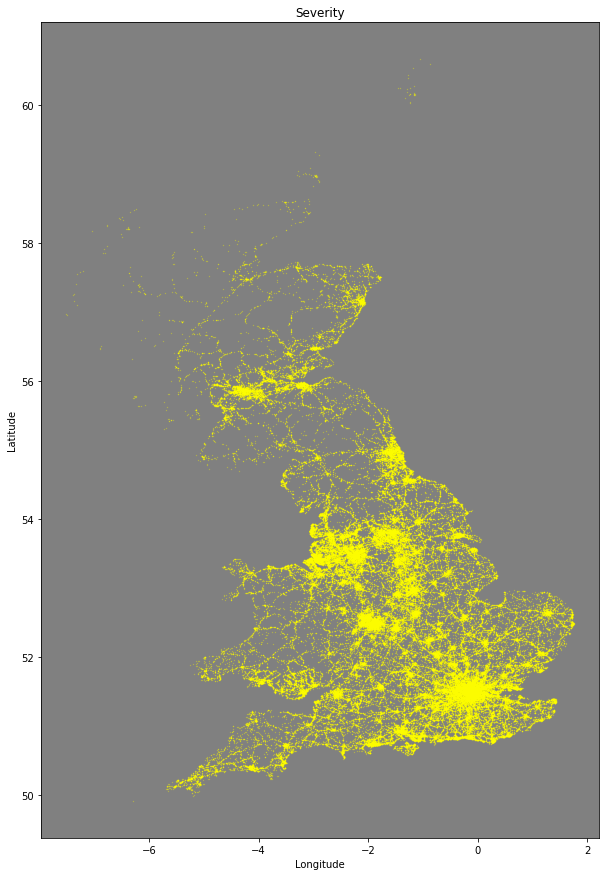

In [120]:
level12 = df[df['Accident_Severity'] == 1]

fig, ax = plt.subplots(1, figsize=(10,15))
level12.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.1, alpha=.5, subplots=True, ax=ax)
ax.set_title("Severity")
ax.set_facecolor('black');

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

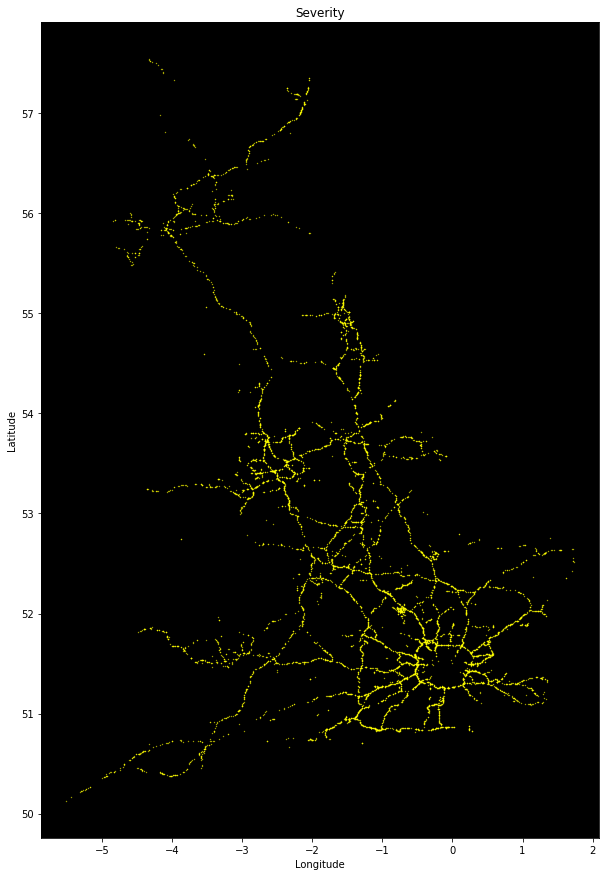

In [76]:

level12 = df[(df['Accident_Severity'] == 1) & (df['Speed_limit'] > 60)]

fig, ax = plt.subplots(1, figsize=(10,15))
level12.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.1, alpha=.9, subplots=True, ax=ax)
ax.set_title("Severity")
ax.set_facecolor('black');

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

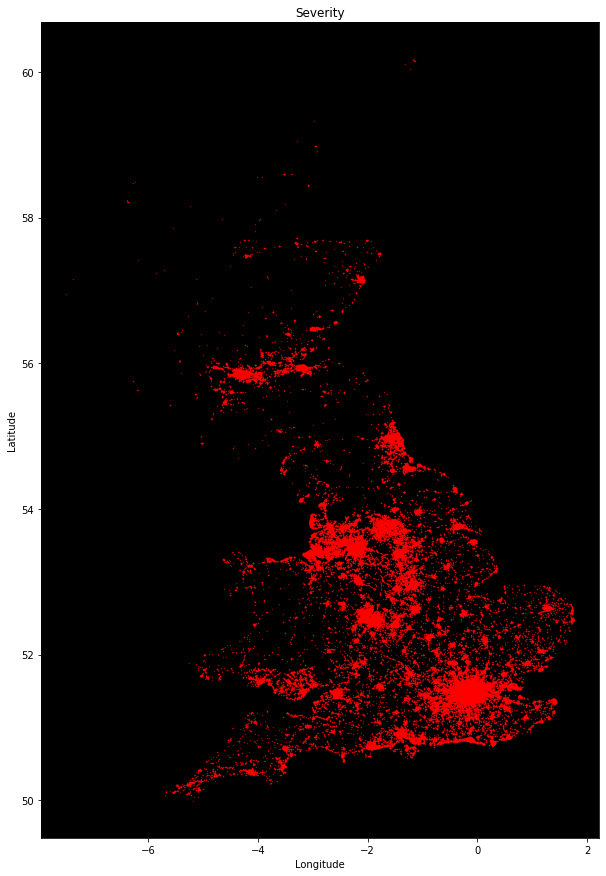

In [77]:

level12 = df[(df['Accident_Severity'] == 1) & (df['Speed_limit'] < 60)]

fig, ax = plt.subplots(1, figsize=(10,15))
level12.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='red', 
                s=.1, alpha=.9, subplots=True, ax=ax)
ax.set_title("Severity")
ax.set_facecolor('black');

plt.show

In [55]:
limit_0 = sev_0.groupby(['Speed_limit'])['Accident_Index'].count().reset_index()

limit_1 = sev_1.groupby(['Speed_limit'])['Accident_Index'].count().reset_index()

fig, ax = plt.subplots(1, figsize=(15, 6))
bar_width = 0.8
x1 = limit_0.iloc[:, 0]
x2 = limit_1.iloc[:,0]
y1 = limit_0.iloc[:,1]
y2 = limit_1.iloc[:,1]
ax.bar(x1, y1, color='royalblue', width=bar_width, align='edge', label='lack of Severity')
ax.bar(x2, y2, color='tomato', width=-bar_width, align='edge', label='Severity')
plt.xticks(rotation=45, fontsize=10, horizontalalignment='center')
ax.set_ylabel("Number of Accidents", fontsize=15)
ax.set_title("Speed Limit", fontsize=18)
fig.tight_layout()
ax.legend()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a1bd9bd40> (for post_execute):


KeyboardInterrupt: 

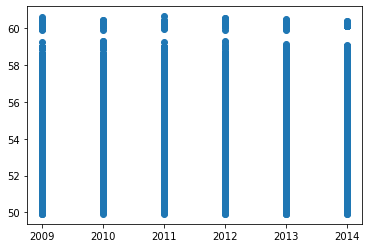

In [56]:
import matplotlib.pyplot as plt
plt.scatter(df['Year'], df['Latitude'])
plt.show() 

In [19]:
model2 = LogisticRegression()
model2.fit(X, y)

print(model2.summary())


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)

y_pred_x = logreg.predict(X_test)
y_pred = logreg.predict_proba(X_test)
y_pred_prob = y_pred[:,1]
y_pred_new_thresh= y_pred_prob >= .16

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_new_thresh)
print(cm)

In [ ]:
# df = pd.read_csv("./data/clean_one_hot_data.csv")
# df.drop(df.columns[0], axis=1,inplace=True)
# y = df['attrition']
# X = df[lasso_coeffs]
# w = {0:5, 1:95}
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(df)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# logreg = LogisticRegression(max_iter=5000, class_weight=w)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# # con_matrix = confusion_matrix(y_test, y_pred).ravel()
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test,y_pred)}')

In [ ]:
# X = data_final.loc[:, data_final.columns != 'y']
# y = data_final.loc[:, data_final.columns == 'y']
# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# columns = X_train.columns
# os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# # we can Check the numbers of our data

